## Titanic: Machine Learning From Disaster

Problem definition: In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

# Config
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
df = pd.read_csv("train.csv")
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Age'] = df['Age'].astype(int)

df.head(n=20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C


In [3]:
def age_group(age):
    '''
    Divide passengers into age groups
    '''
    if age < 13:
        return 'Child'
    elif age < 17 and age >= 13:
        return "Teen"
    elif age < 60 and age >= 17:
        return "Adult"
    else:
        return "Senior Citizen"

df['Age Group'] = df['Age'].apply(age_group)

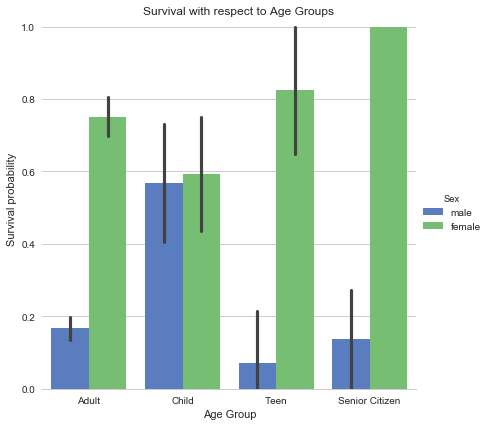

In [4]:
# Draw a nested barplot to show survival for Age Group and sex
g = sns.factorplot(x="Age Group", y="Survived", hue="Sex", data=df ,size=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("Survival probability")
g.fig.suptitle("Survival with respect to Age Groups")

#### We can observe that most of the passengers on board were adults (16-60)

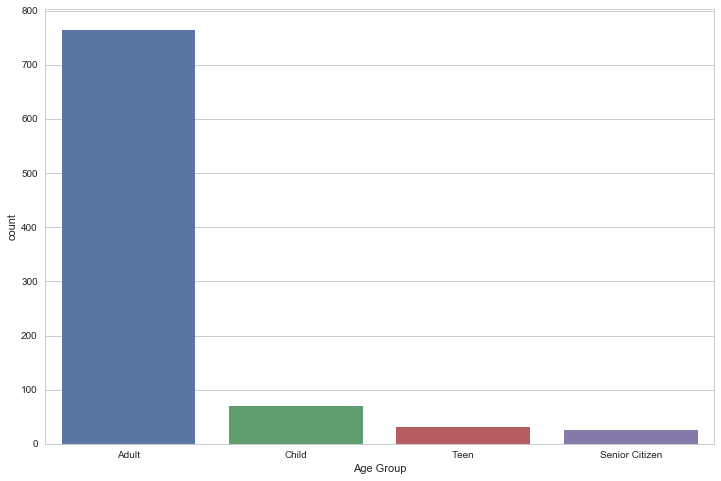

In [5]:
g = sns.countplot(x="Age Group", data=df)
g.figure.set_size_inches(12,8)

#### We can see that most of the passengers were middle aged (fairly young)

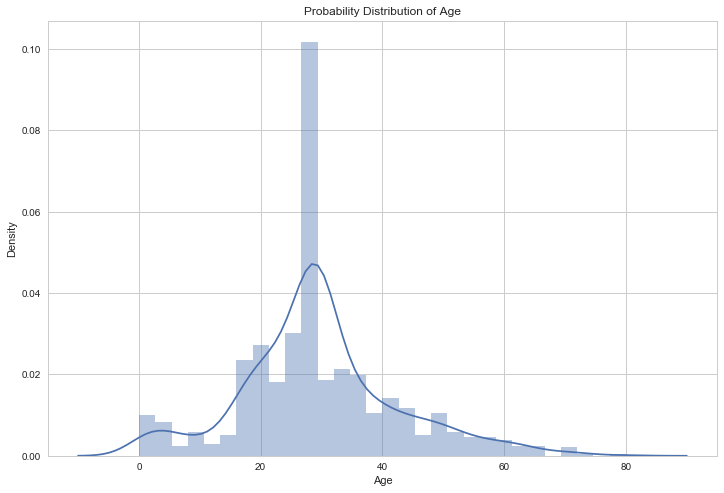

In [6]:
g = sns.distplot(df['Age'])
g.figure.set_size_inches(12,8)
g.axes.set_title('Probability  of Age')
# Set the xlabel of the graph from here
g.set_xlabel("Age")
# Set the ylabel of the graph from here
g.set_ylabel("Density")

#### It can be observed that the density of survived is higher than not survived under age 10

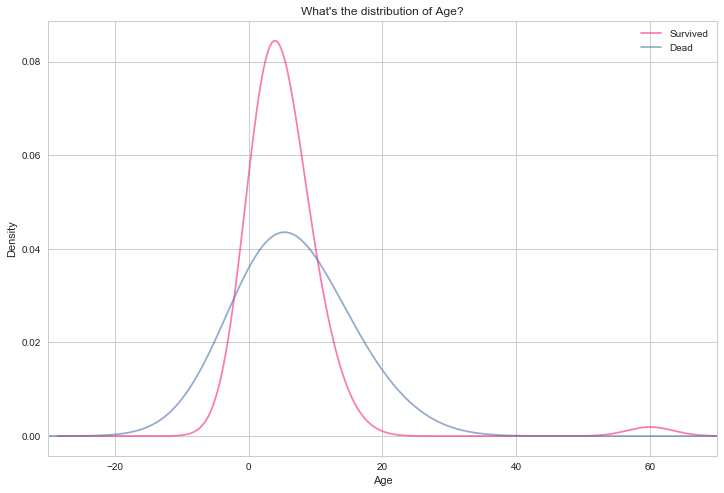

In [18]:
df[df['Survived'] == 1]['Age'].value_counts().plot(kind='density', color='#FA2379', label='Survived', figsize=(12, 8), alpha = 0.6)
df[df['Survived'] == 0]['Age'].value_counts().plot(kind='density', label='Dead', figsize=(12, 8), alpha = 0.6)
plt.xlabel('Age')
plt.xlim(-30, 70)
plt.title("What's the distribution of Age?" )
plt.legend(loc='best')

#### It can be clearly observed that more men died than women

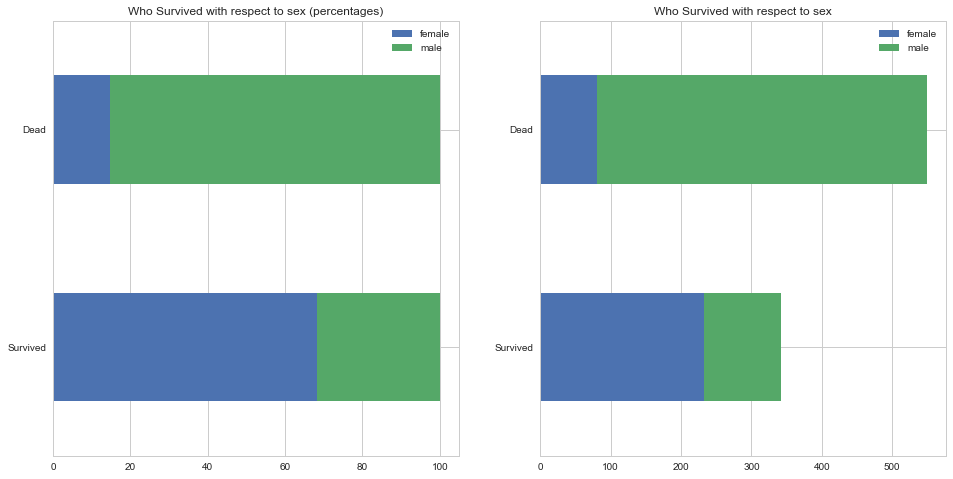

In [48]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

survived_sex = df[df['Survived'] == 1]['Sex'].value_counts()
dead_sex = df[df['Survived'] == 0]['Sex'].value_counts()

sex_survival_df = pd.DataFrame([(survived_sex / survived_sex.sum()) * 100, (dead_sex / dead_sex.sum() * 100)])
sex_survival_df.index = ['Survived', 'Dead']

sex_survival_df.plot(kind='barh', stacked=True, ax=ax[0], title="Who Survived with respect to sex (percentages)")
                    
survived_sex = df[df['Survived'] == 1]['Sex'].value_counts()
dead_sex = df[df['Survived'] == 0]['Sex'].value_counts()

sex_survival_df = pd.DataFrame([survived_sex, dead_sex])
sex_survival_df.index = ['Survived', 'Dead']

sex_survival_df.plot(kind='barh', stacked=True, ax=ax[1], title="Who Survived with respect to sex")

#### People who paid the highest fare had a higher chance of survival

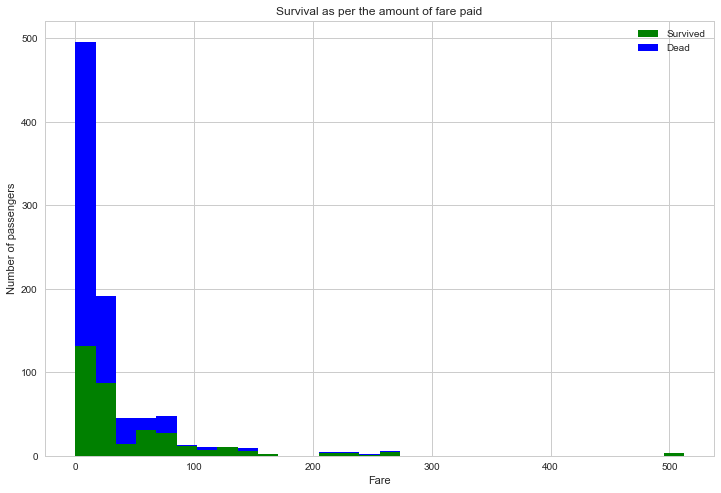

In [53]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.hist([df[df['Survived'] == 1]['Fare'], df[df['Survived'] == 0]['Fare']], stacked=True, color=['g','b'], bins=30, label=['Survived','Dead'])
ax.set_xlabel('Fare') 
ax.set_ylabel('Number of passengers')
ax.set_title("Survival as per the amount of fare paid")
ax.legend()

#### Age and survival 

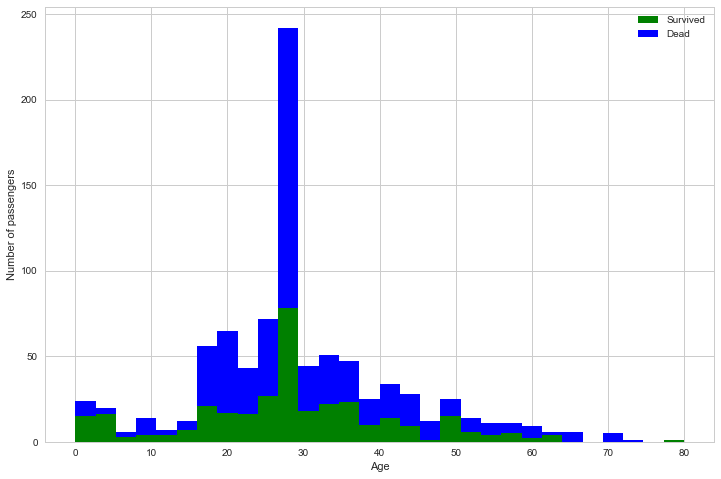

In [67]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.hist([df[df['Survived'] == 1]['Age'], df[df['Survived'] == 0]['Age']], stacked=True, color=['g','b'], bins=30,
         label=['Survived','Dead'])
ax.set_xlabel('Age') 
ax.set_ylabel('Number of passengers')
ax.legend()

#### Ticket class had a significant impact on survival

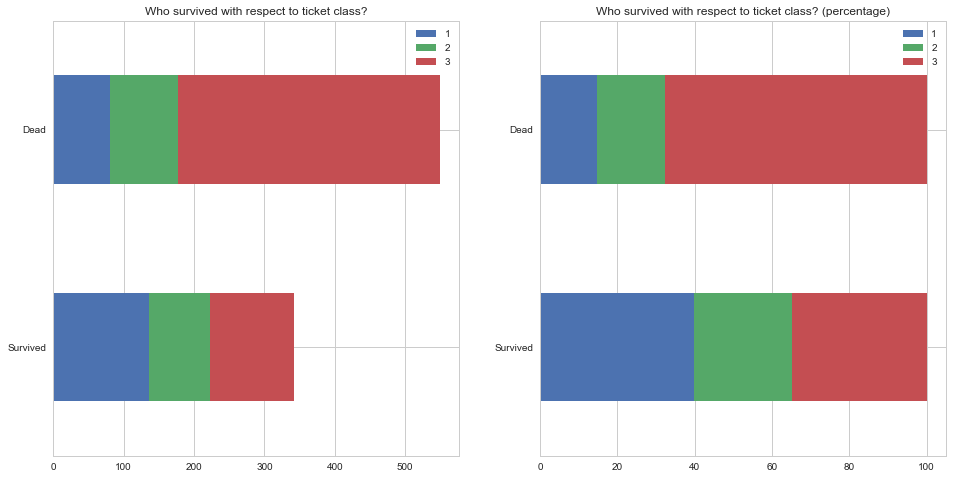

In [59]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

survived = df[df['Survived'] == 1]['Pclass'].value_counts()
dead = df[df['Survived'] == 0]['Pclass'].value_counts()

df_embarked = pd.DataFrame([survived, dead])
df_embarked.index = ['Survived', 'Dead']
df_embarked.plot(kind='barh', stacked=True, ax=ax[0], title="Who survived with respect to ticket class?")

df_embarked = pd.DataFrame([(survived / survived.sum()) * 100, (dead / dead.sum()) * 100])
df_embarked.index = ['Survived', 'Dead']
df_embarked.plot(kind='barh', stacked=True, ax=ax[1], title="Who survived with respect to ticket class? (percentage)")

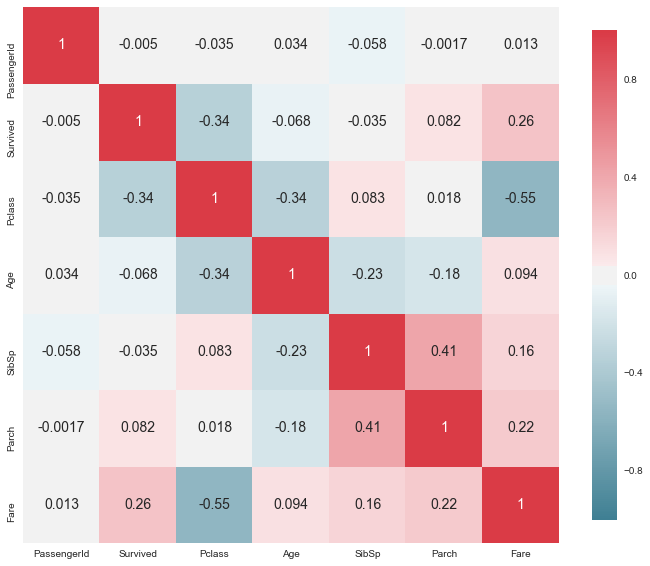

In [65]:
def plot_correlation_map(df):
    corr = df.corr()
    _ , ax = plt.subplots(figsize =( 12 , 10 ))
    cmap = sns.diverging_palette(220, 10, as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 14 }
    )

plot_correlation_map(df)